# Chapter 2: Time series graphics

#### 2.1 The ecuador favorita store sales dataset 

The training data, comprising time series of features store_nbr, family, and onpromotion as well as the target sales:

- **store_nbr** identifies the store at which the products are sold.
- **family** identifies the type of product sold.
- **sales** gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
- **onpromotion** gives the total number of items in a product family that were being promoted at a store at a given date.

In [75]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# loading sales forecast ecuador data (kaggle learning competition)
sales=pd.read_csv("data/store-sales-time-series-forecasting/train.csv")
sales.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [11]:
sales.family.unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [160]:
alcohol=sales[(sales.family=="LIQUOR,WINE,BEER") & (sales.store_nbr==4)]


In [ ]:
# Convert date to datetime format if it's not
alcohol["date"] = pd.to_datetime(alcohol["date"])

# Extract month and year from the date
alcohol["month"] = alcohol["date"].dt.month
alcohol["year"] = alcohol["date"].dt.year
alcohol["day"] = alcohol["date"].dt.day
alcohol['date_with_day'] = alcohol['date'].dt.strftime('%Y-%m-%d (%A)')



# Group by month and year and sum the sales
agg_sales = alcohol.groupby(["year", "month"])["sales"].sum().reset_index()

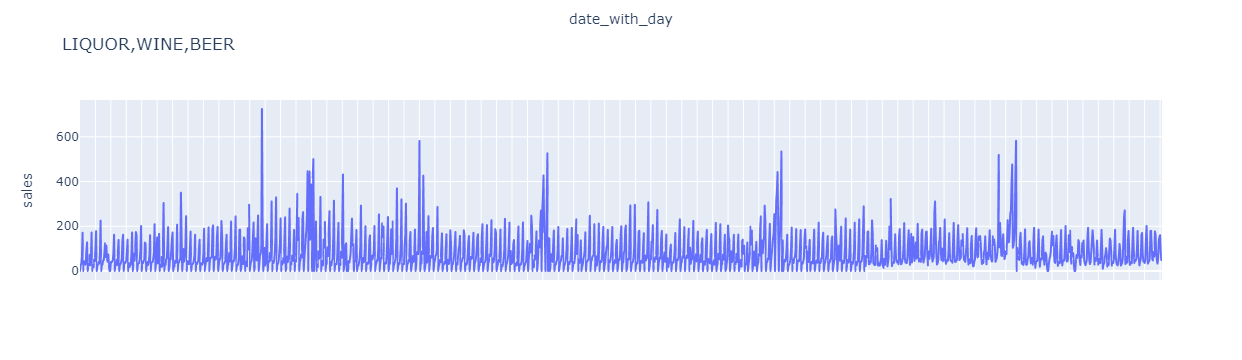

In [163]:
fig = px.line(alcohol, x="date_with_day", y="sales", title="LIQUOR,WINE,BEER")

# Show the plot
fig.update_layout(xaxis=dict(showticklabels=False))
fig.show()


#### Plots allows us to identify:

    - Patterns.
    - Unsual observations.
    - Changes over time.
    - Relationship between variables.

#### Time series patterns are:
- **Trends** which is a long term increase or decrease in data. 
- **Seasonal** patterns is when data is affected by season daily, monthly or yearly change. Seasonality is fixed in time. 
- **Cycles** are different from season, they occure in time variable fashion and comes with variable amplitude. 

#### Seasonal plots

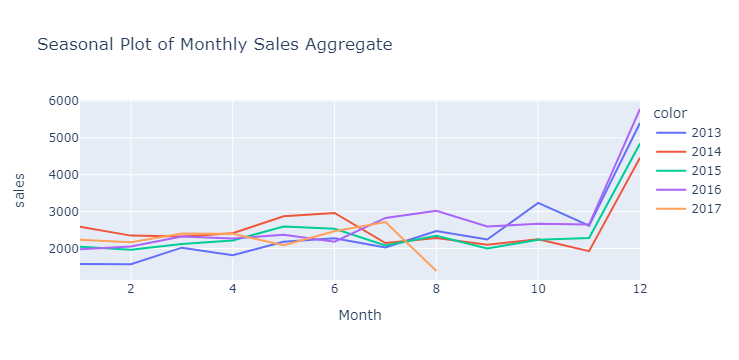

In [119]:
fig = px.line(alcohol, x=alcohol["date"].dt.month, y=alcohol["sales"], color=alcohol["date"].dt.year.astype(str),
              labels={"Date": "Month"},
              title="Seasonal Plot of Monthly Sales")
fig = px.line(agg_sales, x="month", y="sales", color=agg_sales["year"].astype(str),
              labels={"month": "Month"},
              title="Seasonal Plot of Monthly Sales Aggregate")

fig.show()



C:\Users\wail.elbani\Anaconda3\envs\gym\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\Users\wail.elbani\AppData\Local\Temp\ipykernel_468\324773588.py:6: UserWarning:

The figure layout has changed to tight



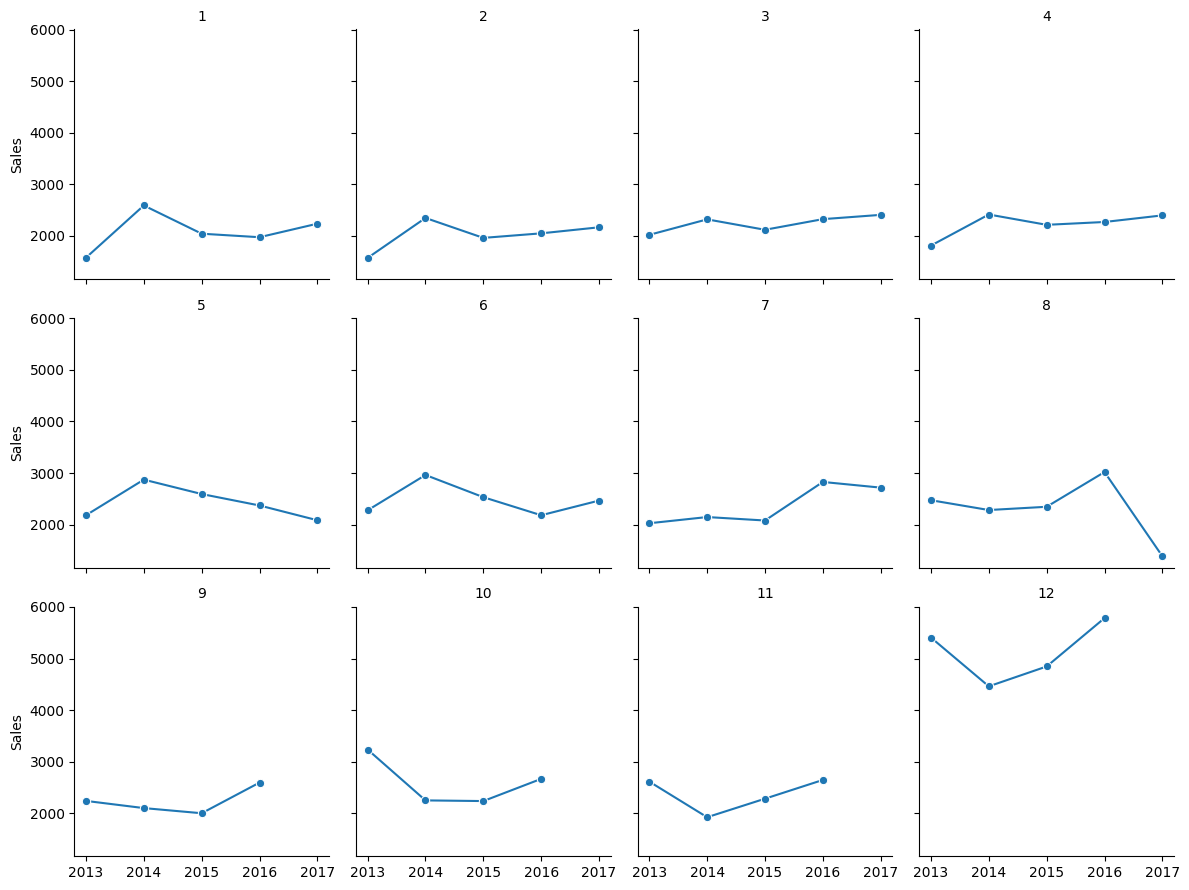

In [120]:
g = sns.FacetGrid(agg_sales, col="month", col_wrap=4, height=3, sharey=True)  # 'sharey=False' means each subplot can have its own y-axis scale
g.map_dataframe(sns.lineplot, x="year", y="sales", marker="o")
g.set_titles("{col_name}")
g.set_axis_labels("", "Sales")

plt.tight_layout()
plt.show()

From the seasonal plots we could see that alcoholic drinks are mostly sold in december for christmas

### Scatter Plots

In [122]:
oil=pd.read_csv("data/store-sales-time-series-forecasting/oil.csv")
# Convert date to datetime format if it's not
oil["date"] = pd.to_datetime(oil["date"])

# Extract month and year from the date
oil["month"] = oil["date"].dt.month
oil["year"] = oil["date"].dt.year

# Group by month and year and sum the sales
agg_oil = oil.groupby(["year", "month"])["dcoilwtico"].sum().reset_index()
sales_oil = pd.merge(agg_oil, agg_sales, on=['year', 'month'])
sales_oil.head()

,year,month,dcoilwtico,sales
0,2013,1,1989.89,1579.0
1,2013,2,1810.87,1575.0
2,2013,3,1858.77,2022.0
3,2013,4,2024.47,1814.0
4,2013,5,2079.21,2183.0


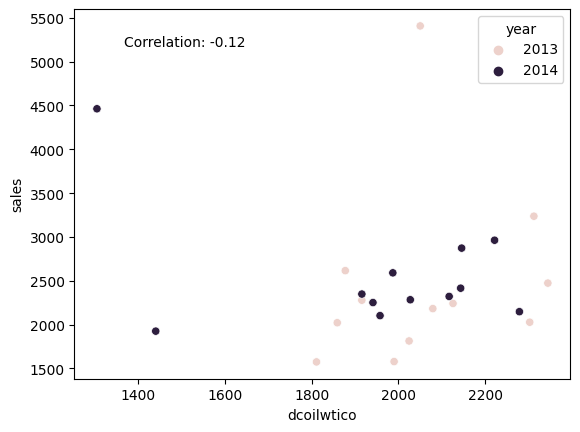

In [116]:

filtered_sales_oil = sales_oil[sales_oil['year'].between(2012, 2014)]
correlation = filtered_sales_oil['dcoilwtico'].corr(sales_oil['sales'])
plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)
sns.scatterplot(data=filtered_sales_oil, x='dcoilwtico', y='sales',hue='year')
plt.show()

In [127]:
alcohol

,id,store_nbr,family,sales,onpromotion,month,year,day
date,,,,,,,,
2013-01-01,1111,4,"LIQUOR,WINE,BEER",0.0,0,1,2013,1
2013-01-02,2893,4,"LIQUOR,WINE,BEER",27.0,0,1,2013,2
2013-01-03,4675,4,"LIQUOR,WINE,BEER",31.0,0,1,2013,3
2013-01-04,6457,4,"LIQUOR,WINE,BEER",61.0,0,1,2013,4
2013-01-05,8239,4,"LIQUOR,WINE,BEER",171.0,0,1,2013,5
...,...,...,...,...,...,...,...,...
2017-08-11,2993089,4,"LIQUOR,WINE,BEER",152.0,8,8,2017,11
2017-08-12,2994871,4,"LIQUOR,WINE,BEER",160.0,6,8,2017,12
2017-08-13,2996653,4,"LIQUOR,WINE,BEER",82.0,5,8,2017,13


### Lag plots

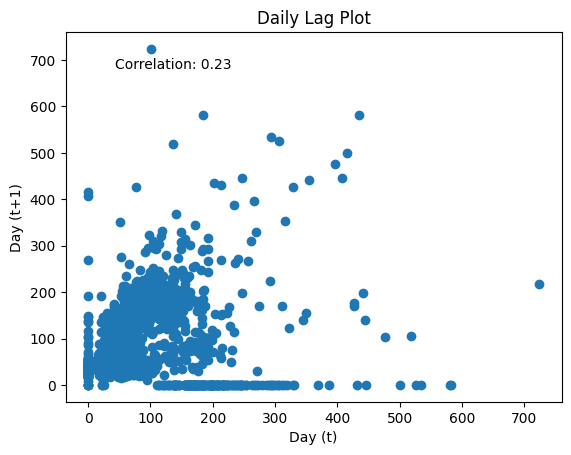

In [133]:
# alcohol.set_index('date', inplace=True)
correlation = alcohol['sales'].iloc[:-1].corr(alcohol['sales'].shift(-1).dropna())

# Generate a daily lag plot
plt.scatter(alcohol['sales'].iloc[:-1], alcohol['sales'].shift(-1).dropna())
plt.xlabel('Day (t)')
plt.ylabel('Day (t+1)')
plt.title('Daily Lag Plot')
plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

plt.show()

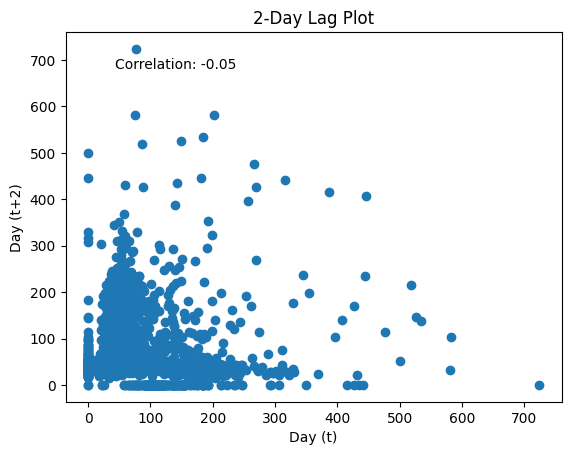

In [136]:
correlation = alcohol['sales'].iloc[:-2].corr(alcohol['sales'].shift(-2).dropna())

plt.scatter(alcohol['sales'].iloc[:-2], alcohol['sales'].shift(-2).dropna())
plt.xlabel('Day (t)')
plt.ylabel('Day (t+2)')
plt.title('2-Day Lag Plot')
plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

plt.show()

An intersting take away from the lag-1 plot is that there is a positive correlation. this could be explained by weekends and holidays (people tend to drink two days in a row).

### Autocorrelation

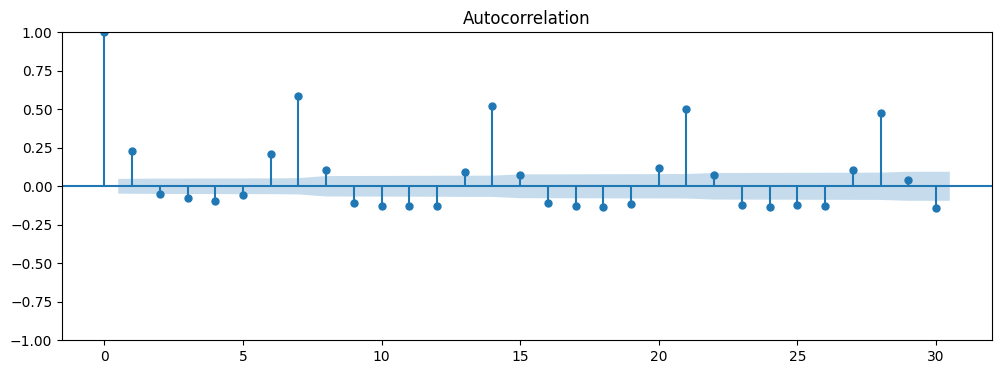

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

fig, ax = plt.subplots(figsize=(12, 4))
sm.graphics.tsa.plot_acf(alcohol["sales"], lags=30, ax=ax)
plt.show()


Alcohol consumption is seasonal (every saturday) therefore autocorrelation is high every six day